# Dataset Analysis of Water Quality Data collected by EPA

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warning messages.
warnings.filterwarnings("ignore")

The CSV files for the 10 year is separated into two different files. We will combine them first. **DO NOT RUN THE CELL BELOW**. csv files were filtered manually in excel due to the lack of available memory to run the code

In [ ]:
# Load the data from the two CSV files into separate DataFrames
df1 = pd.read_csv('../Predicting-quality-levels-in-water/Datasets/Original_Dataset_2013to2018.csv')
df2 = pd.read_csv('../Predicting-quality-levels-in-water/Datasets/Original_Dataset_2018to2023.csv')

# Concatenate the DataFrames vertically (row-wise)
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
output_file_path = '../Predicting-quality-levels-in-water/Datasets/Original_Dataset_10Year.csv'
combined_df.to_csv(output_file_path, index=False)

We will use the Original 1 year dataset as an example instead

In [56]:
df = pd.read_csv('../Predicting-quality-levels-in-water/Datasets/Original_Dataset_1Year.csv', encoding='latin-1')

Look at the dataset

In [57]:
df.head().T

,0,1,2,3,4
OrganizationIdentifier,USGS-TX,USGS-TX,USGS-TX,USGS-TX,USGS-TX
ActivityIdentifier,nwistx.01.02202479,nwistx.01.02202479,nwistx.01.02202479,nwistx.01.02202479,nwistx.01.02202479
ActivityTypeCode,Unknown,Unknown,Unknown,Unknown,Unknown
ActivityMediaName,Water,Water,Water,Water,Water
ActivityMediaSubdivisionName,Surface Water,Surface Water,Surface Water,Surface Water,Surface Water
...,...,...,...,...,...
TADA.ResultDepthHeightMeasure.MeasureValue,NaN,NaN,NaN,NaN,NaN
TADA.ResultDepthHeightMeasure.MeasureUnitCode,NaN,NaN,NaN,NaN,NaN
TADA.ResultDepthHeightMeasure.MeasureValueDataTypes.Flag,ND or NA,ND or NA,ND or NA,ND or NA,ND or NA
TADA.Remove,False,False,False,False,False


Look at the shape of the data frame

In [58]:
print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 153
Samples: 573789


Show some general stats of the data frame

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SampleAquifer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ActivityLocation.LatitudeMeasure,451132.0,3.880411e+01,6.653121e+00,0.000000e+00,3.340380e+01,3.904220e+01,4.461805e+01,6.049215e+01
ActivityLocation.LongitudeMeasure,451132.0,-8.965102e+01,2.064489e+01,-1.498110e+02,-9.420313e+01,-8.788250e+01,-8.160664e+01,1.126722e+02
DataQuality.BiasValue,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DataQuality.ConfidenceIntervalValue,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DataQuality.UpperConfidenceLimitValue,45.0,1.868444e+01,3.542828e+01,3.700000e+00,5.500000e+00,1.190000e+01,2.360000e+01,2.422000e+02
DataQuality.LowerConfidenceLimitValue,45.0,6.184444e+00,1.781312e+01,0.000000e+00,1.000000e-01,2.300000e+00,7.800000e+00,1.195000e+02
USGSPCode,122657.0,1.448254e+04,2.668277e+04,4.000000e+00,1.910000e+02,4.000000e+02,1.145000e+03,9.999700e+04
ResultDepthHeightMeasure.MeasureValue,116859.0,1.128314e+01,1.312604e+01,0.000000e+00,3.000000e+00,7.000000e+00,1.500000e+01,2.120000e+02
SubjectTaxonomicName,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the data frame, we can see that there are many
- Unecessary Parameters
- NaN Values
- Incosistent Units

In this case, while also considering the enormous size of the file, the cleaning of the data frame will be done outside of this notebook and will refernce the prepares csv file instead

In [60]:
df = pd.read_csv('../Predicting-quality-levels-in-water/Datasets/Filtered_Dataset_1Year.csv')

Looking at the filtered data frame

In [61]:
df.head()

,Unnamed: 0,"CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN","CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN","DEPTH, SECCHI DISK DEPTH",DISSOLVED OXYGEN (DO),"NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)",PHOSPHORUS
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,8/30/22 14:53,NaN,NaN,165.0,3769.565217,NaN,NaN
3,(blank),NaN,NaN,165.0,NaN,NaN,NaN
4,25.6377,NaN,NaN,NaN,NaN,NaN,NaN


Removing the first column as it is still irrelevant in our analysis

In [62]:
df = df.drop(labels = 'Unnamed: 0', axis = 1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30748 entries, 0 to 30747
Data columns (total 6 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN                       4080 non-null   float64
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                     4129 non-null   float64
 2   DEPTH, SECCHI DISK DEPTH                                      12103 non-null  float64
 3   DISSOLVED OXYGEN (DO)                                         10663 non-null  float64
 4   NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)  4089 non-null   float64
 5   PHOSPHORUS                                                    9996 non-null   float64
dtypes: float64(6)
memory usage: 1.4 MB


Show each parameter affects our main focus of Nitrogen

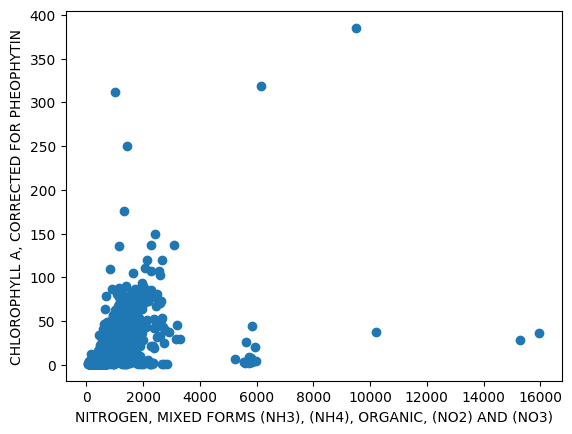

In [69]:
#Create a Scatter Plot
x = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'
y = 'CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN'
plt.scatter(df[x],df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

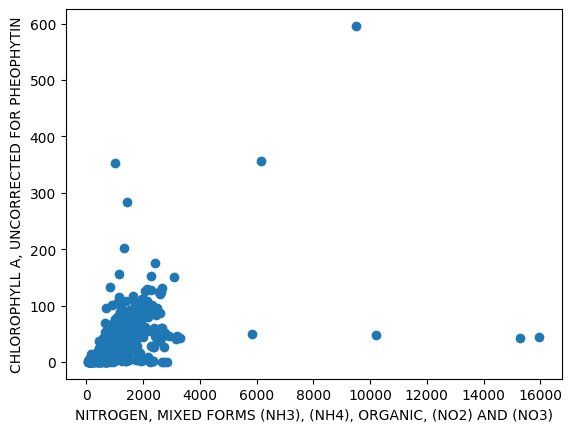

In [70]:
#Create a Scatter Plot
x = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'
y = 'CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'
plt.scatter(df[x],df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

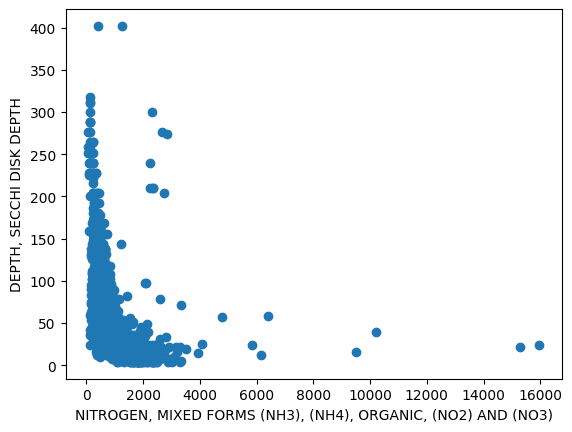

In [71]:
#Create a Scatter Plot
x = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'
y = 'DEPTH, SECCHI DISK DEPTH'
plt.scatter(df[x],df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

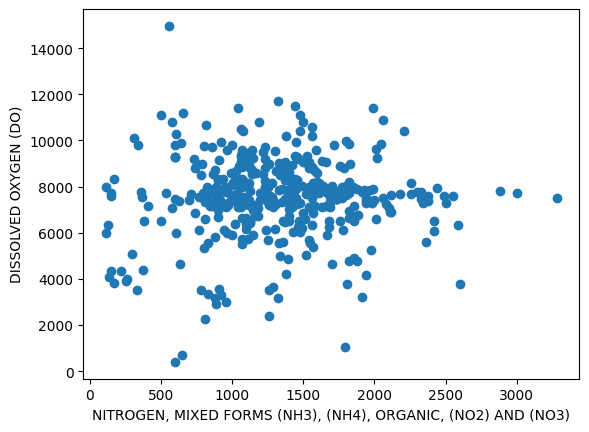

In [72]:
#Create a Scatter Plot
x = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'
y = 'DISSOLVED OXYGEN (DO)'
plt.scatter(df[x],df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

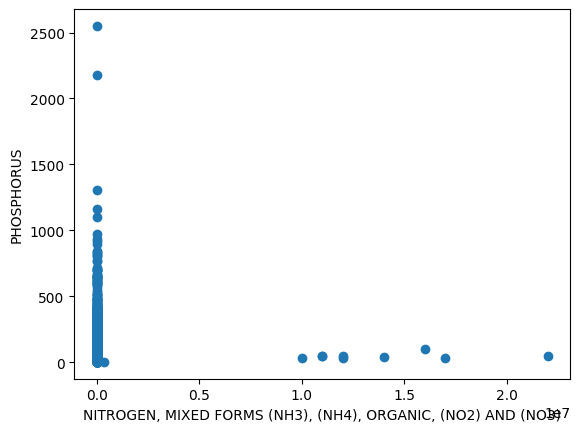

In [73]:
#Create a Scatter Plot
x = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'
y = 'PHOSPHORUS'
plt.scatter(df[x],df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.show()